In [139]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

In [319]:
data = np.genfromtxt(r'C:\Users\onix\Desktop\current_field', delimiter=' ', skip_header=2)
coords = data[:, [0, 1, 2]]

with open(r'C:\Users\onix\Desktop\coords.pts', 'w') as coords_file:
    for row in coords:
        x, y, z = row
        s = f'{x} {y} {z}\n'
        coords_file.write(s)

In [338]:
# get data, be mindful of which axis is which when we reshape B

# entire field plate gap is 0<z<25mm, -3mm<y<3mm
# beam path is 10mm<z<15mm, -0.4mm<y<0.4mm, as this E3 xtl has b-axis = z-axis length of 5mm. This assumes a beam waist of 0.8 mm
# initial setup: 10x80x100mm iron plates with their far side 66mm from xtl, where current SmCo magnets are, permeability of 70, 100x3x100 SmCo Magnets with near sides 43mm from xtl, which is the distance frmo xtl to thermal base

#file =  r'C:\Users\onix\Desktop\data1' # entire field plate gap, initial setup 

# from here on we look only at the beam path (although, the incorrect beam path)
#file =  r'C:\Users\onix\Desktop\data2' # beam path only, initial setup
#file =  r'C:\Users\onix\Desktop\data4' # beam path only, initial setup, permeability = 70,000


#file = r'C:\Users\onix\Desktop\data6' # perm = 70, elongated iron and moved them in to close all gaps, iron is now 89mm long, with y = -43mm and x = 50mm, -60mm
#file = r'C:\Users\onix\Desktop\data7' # perm = 70, took the above design and moved each iron piece 20mm outward. Made magnets bigger to keep a closed design
#file = r'C:\Users\onix\Desktop\data8' # above but moved the iron in 20mm from their initial positions. Kept magnets the same.
#file = r'C:\Users\onix\Desktop\data9' # moved the iron 10mm apart, kept SmCo sizes from above
#file = r'C:\Users\onix\Desktop\data10' # moved the iron 180mm apart, enlarged SmCo to keep a closed box  ## best so bar


#file = r'C:\Users\onix\Desktop\data11' # brought the SmCo in by 10cm each
#file = r'C:\Users\onix\Desktop\data13' #thickened iron
#file = r'C:\Users\onix\Desktop\data14' # above but permeability 70,000
#file = r'C:\Users\onix\Desktop\data15' # cylindrical cutout in the center, perm = 70,000
#file = r'C:\Users\onix\Desktop\data16' # cylindrical addition to the rectangular slabs, perm = 70,000
#file = r'C:\Users\onix\Desktop\data17' # cylindrical addition to the rectangular slabs, perm = 1
#file = r'C:\Users\onix\Desktop\data18' # cylindrical addition to the rectangular slabs, perm = 70
#file = r'C:\Users\onix\Desktop\data19' # cylindrical addition to the rectangular slabs, perm = 70, shrank the rectangular width, so the entire iron thing is further from xtl
#file = r'C:\Users\onix\Desktop\data21' # removed iron entirely, left with SmCo magnets 23mm above / below the origin 200x3x100mm

#file = r'C:\Users\onix\Desktop\current_field' # now we start to look at the actual location of the xtl, 1 mm off center
#file = r'C:\Users\onix\Desktop\daniels_field'

In [339]:
data = np.genfromtxt(file, skip_header = 2)
y_file = data[:,1] * 1000
y = sorted(set(y_file)) # distinct y values
z_file = data[:,2] * 1000
z = sorted(set(z_file)) # distinct z values

B_file = data[:,3] * 10**4

B = B_file.reshape(len(y), len(z))

avg_B = np.mean(B)
B_pp = np.max(B) - np.min(B)
std_B = np.std(B)
print(f'Average = {avg_B} G \t Peak to Peak = {B_pp} G')
# 359.7, 2.65, 1.6

Average = 637.8357458861711 G 	 Peak to Peak = 1.652222802457345 G


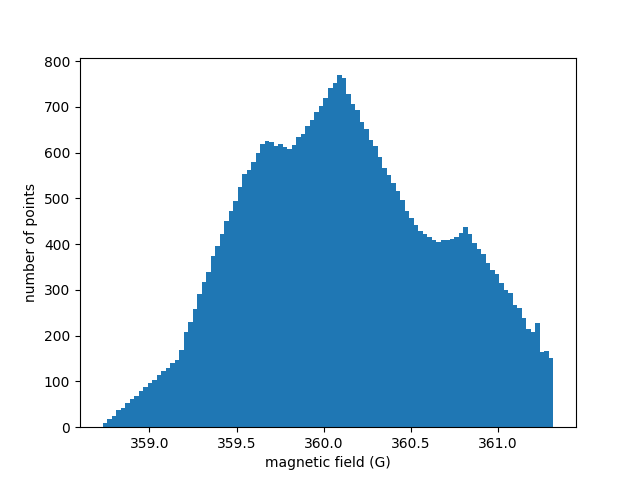

In [337]:
B_flat = B.flatten()

#hist, bin_edges = np.histogram(B, bins=100)

plt.figure()
plt.hist(B_flat, bins=100)
plt.xlabel('magnetic field (G)')
plt.ylabel('number of points')
plt.show()

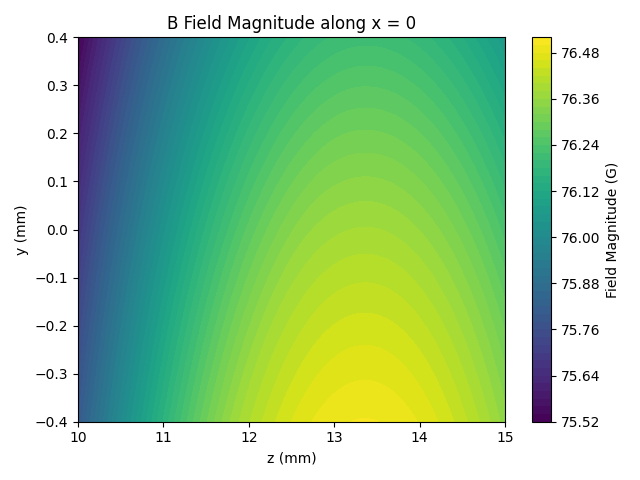

In [314]:
# Contour plot
fig, ax = plt.subplots()

cs = ax.contourf(z,y,B, levels = 50)
ax.set_xlabel("z (mm)")
ax.set_ylabel("y (mm)")
ax.set_title("B Field Magnitude along x = 0")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Field Magnitude (G)')
plt.tight_layout()
plt.show()

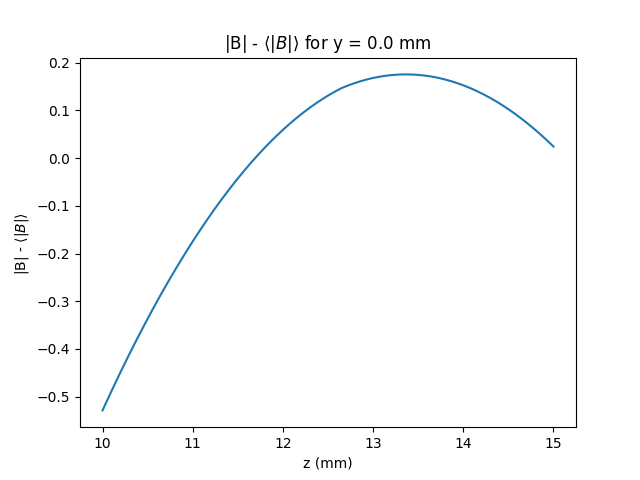

In [315]:
# Fix y and plot |B|(z)
y_val = np.float64(0)
index = np.where(y == y_val)[0][0]

B_y_section = B[index,:]

fig, ax = plt.subplots()
ax.plot(z, B_y_section - np.mean(B_y_section))
ax.set_xlabel("z (mm)")
ax.set_ylabel(r"|B| - $\langle |B| \rangle $ ")
ax.set_title(r"|B| - $\langle |B| \rangle $ " + f"for y = {y_val} mm");
plt.show()

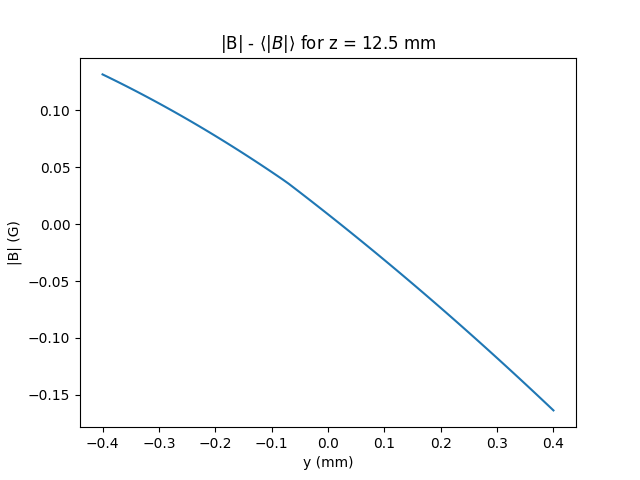

In [316]:
# Fix z and plot |B|(y)
z_val = np.float64(12.5)
index = np.where(z == z_val)[0][0]
B_z_section = B[:,index]

fig, ax = plt.subplots()
ax.plot(y, B_z_section - np.mean(B_z_section))
ax.set_xlabel("y (mm)")
ax.set_ylabel("|B| (G)")
ax.set_title(r"|B| - $\langle |B| \rangle $ " + f"for z = {z_val} mm");
plt.show()